In [84]:
%matplotlib inline

import sys
import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
from matplotlib import pyplot as plt, animation, rc,colors
from datetime import datetime, timedelta
from cartopy import crs, feature
import cmocean
import yaml

from IPython.display import Image
rc('animation', html='html5')

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [85]:
def time_prob(x0,k):
    tmin = (x0**2/(4*k))/86400
    tmax = ((((x0+(285*k))/0.4)**2)/(np.pi*k))//86400
    return tmin,tmax

In [86]:
# surf=xr.open_dataset(paths['mask'],decode_times=False).coast_mask[0,1,:,:]
# fig,ax=plt.subplots(1,1,figsize=(5,10))
# ax.contour(surf)
# ax.set_aspect(1/np.sin(np.deg2rad(49)))

In [87]:
# Define paths
local = 0 #Set to 0 when working on server
paths = path(local)
config='/home/jvalenti/MOAD/analysis-jose/OParcels/beach100.yaml'

In [88]:
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
dt = param['param']['dt'] #toggle between - or + to pick backwards or forwards 
N = param['param']['N'] # number of deploying locations
n = param['param']['n'] # 1000   # number of particles per location
dmin = param['param']['dmin'] #minimum depth
dd = param['param']['dd'] #max depth difference from dmin
name = param['file']['name'] #name output file
name2 = 'beach500'
name3 = 'beach50'
#WS = param['particle']['Ws']

daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile = os.path.join(paths['out'], fn)
fn2 =  name2 + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile2 = os.path.join(paths['out'], fn2)
fn3 =  name3 + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile3 = os.path.join(paths['out'], fn3)

In [89]:
Dat=xr.open_dataset(paths['coords'],decode_times=False)
outf_lat=Dat['nav_lat'][445,304]
outf_lon=Dat['nav_lon'][445,304]
clon, clat = [float(outf_lon)],[float(outf_lat)]

In [90]:
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])
ds = xr.open_dataset(outfile)
ds2 = xr.open_dataset(outfile2)
ds3 = xr.open_dataset(outfile3)

Text(0.5, 1.0, 'Particle beaching for particles released at X distance from the coast')

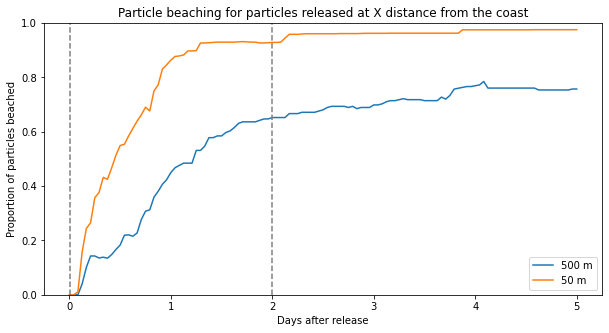

In [91]:
beach = ds.beached
beach2 = ds2.beached
beach3 = ds3.beached

b = []
b2 = []
b3 =[]
for t in range(beach.shape[1]):
    a=np.count_nonzero(beach[:,t] == 0.0)
    a2=np.count_nonzero(beach2[:,t] == 0.0)
    a3=np.count_nonzero(beach3[:,t] == 0.0)
    c=np.count_nonzero(beach[:,t] == 1.0)
    c2=np.count_nonzero(beach2[:,t] == 1.0)
    c3=np.count_nonzero(beach3[:,t] == 1.0)
    b.append(c/(c+a))
    b2.append(c2/(c2+a2))
    b3.append(c3/(c3+a3))
time = np.linspace(0,5,121)
fig,axs = plt.subplots(1,1,figsize=(10,5))
#plt.plot(time,b,label='100 m')
plt.plot(time,b2,label='500 m')
plt.plot(time,b3,label='50 m')
plt.axvline(x=time_prob(50,1)[0],linestyle='--',color='grey')
plt.axvline(x=time_prob(50,1)[1],linestyle='--',color='grey')
plt.legend()
plt.ylim([0,1])
plt.xlabel('Days after release')
plt.ylabel('Proportion of particles beached')
plt.title('Particle beaching for particles released at X distance from the coast')

In [92]:
config='/home/jvalenti/MOAD/analysis-jose/OParcels/beach100-2.yaml'
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
dt = param['param']['dt'] #toggle between - or + to pick backwards or forwards 
N = param['param']['N'] # number of deploying locations
n = param['param']['n'] # 1000   # number of particles per location
dmin = param['param']['dmin'] #minimum depth
dd = param['param']['dd'] #max depth difference from dmin
name = param['file']['name'] #name output file
name2 = 'beach500-2'
name3 = 'beach50-2'
#WS = param['particle']['Ws']

daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile = os.path.join(paths['out'], fn)
fn2 =  name2 + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile2 = os.path.join(paths['out'], fn2)
fn3 =  name3 + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile3 = os.path.join(paths['out'], fn3)

ds = xr.open_dataset(outfile)
ds2 = xr.open_dataset(outfile2)
ds3 = xr.open_dataset(outfile3)

Text(0.5, 1.0, 'Particle beaching for particles released at X distance from the coast')

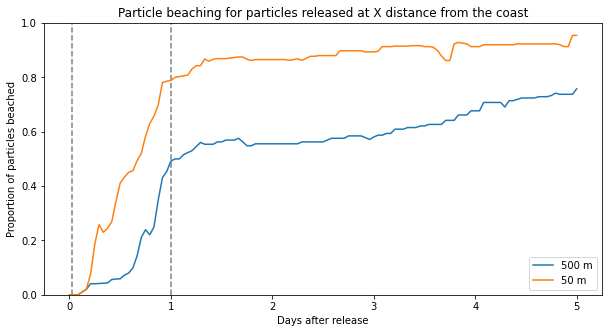

In [93]:
beach = ds.beached
beach2 = ds2.beached
beach3 = ds3.beached

b = []
b2 = []
b3 =[]
for t in range(beach.shape[1]):
    a=np.count_nonzero(beach[:,t] == 0.0)
    a2=np.count_nonzero(beach2[:,t] == 0.0)
    a3=np.count_nonzero(beach3[:,t] == 0.0)
    c=np.count_nonzero(beach[:,t] == 1.0)
    c2=np.count_nonzero(beach2[:,t] == 1.0)
    c3=np.count_nonzero(beach3[:,t] == 1.0)
    b.append(c/(c+a))
    b2.append(c2/(c2+a2))
    b3.append(c3/(c3+a3))
time = np.linspace(0,5,121)
fig,axs = plt.subplots(1,1,figsize=(10,5))
#plt.plot(time,b,label='100 m')
plt.axvline(x=time_prob(50,0.25)[0],linestyle='--',color='grey')
plt.axvline(x=time_prob(50,0.25)[1],linestyle='--',color='grey')
plt.plot(time,b2,label='500 m')
plt.plot(time,b3,label='50 m')
plt.legend()
plt.ylim([0,1])
plt.xlabel('Days after release')
plt.ylabel('Proportion of particles beached')
plt.title('Particle beaching for particles released at X distance from the coast')